# importing libraries

In [1]:
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.shape

(7752, 25)

In [6]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [9]:
pd.set_option('display.max_columns',None)

In [10]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


# Univariate Analysis

In [11]:
cont=[i for i in df.columns if df[i].nunique()>30 and i!="Date"]
cat=[i for i in df.columns if df[i].nunique()<30]

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: Next_Tmax, Length: 183, dtype: int64

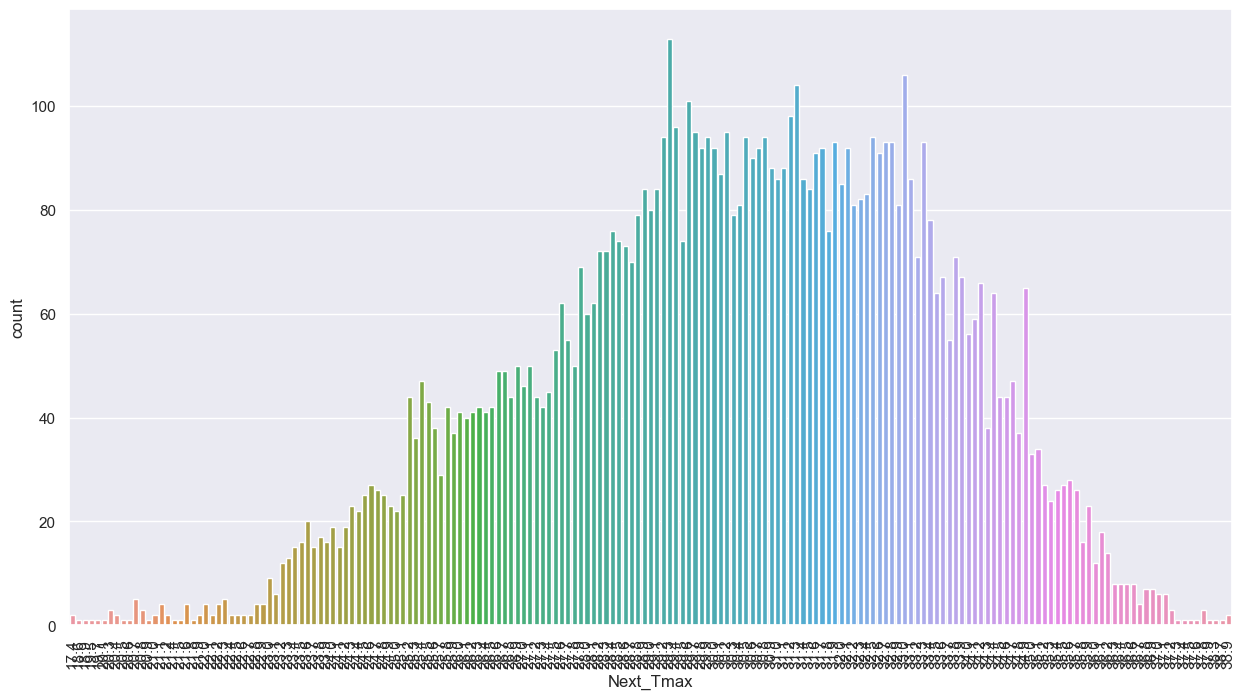

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='Next_Tmax',data=df)
plt.xticks(rotation=90)
df['Next_Tmax'].value_counts()

<bound method IndexOpsMixin.value_counts of 0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: float64>

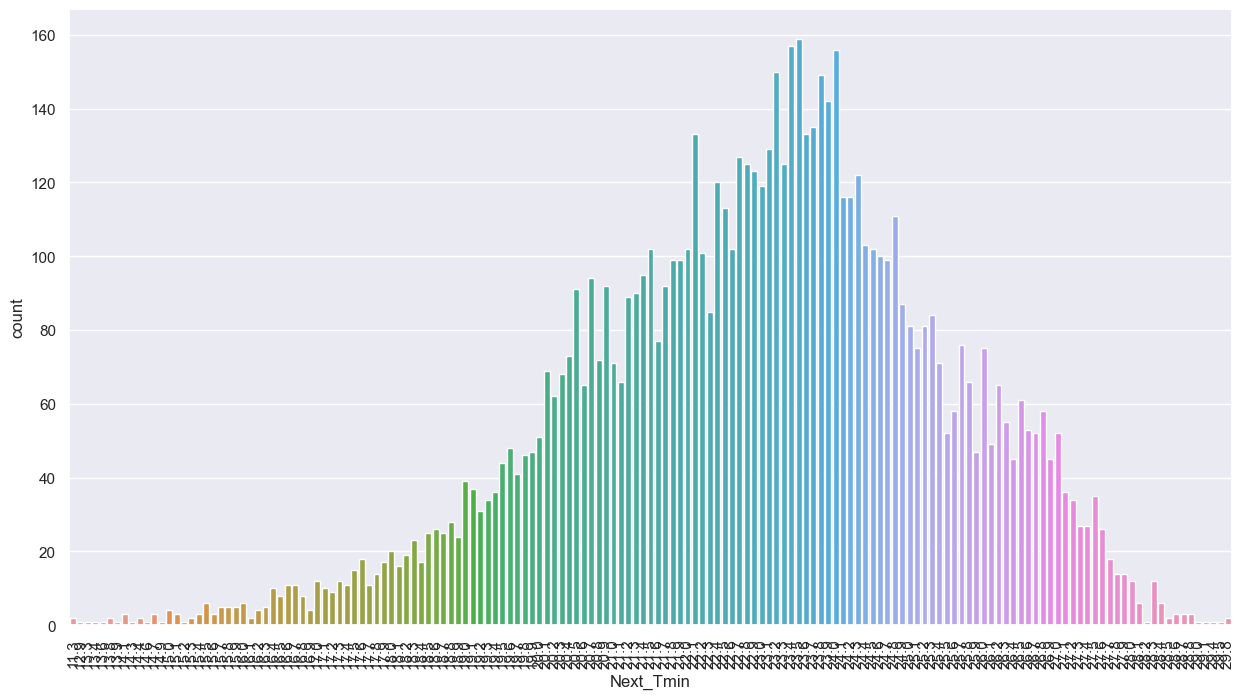

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x='Next_Tmin',data=df)
plt.xticks(rotation=90)
df['Next_Tmin'].value_counts

127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    310
127.058    310
126.970    310
Name: lon, dtype: int64

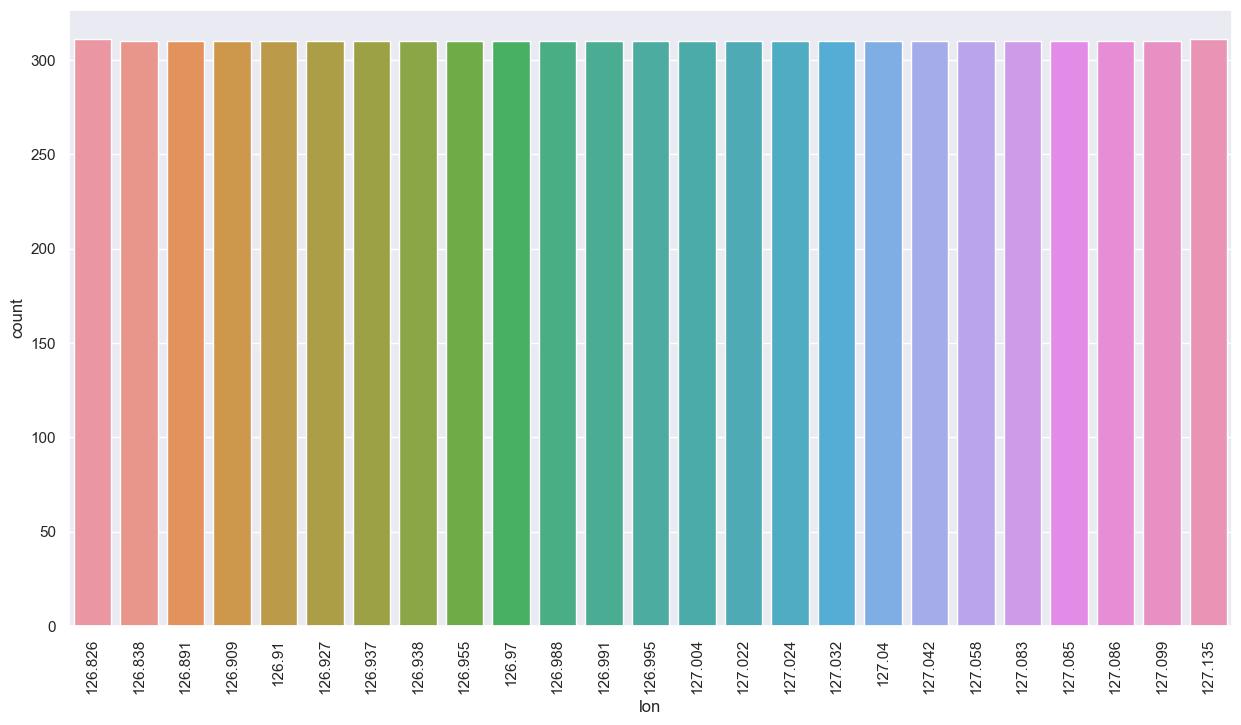

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x="lon" , data=df)
plt.xticks(rotation=90)
df['lon'].value_counts()

Minimum Tmax is 20.0 and Maximum Tmin is 37.6
Minimum Tmin is 11.3 and Maximum Tmin is 29.9


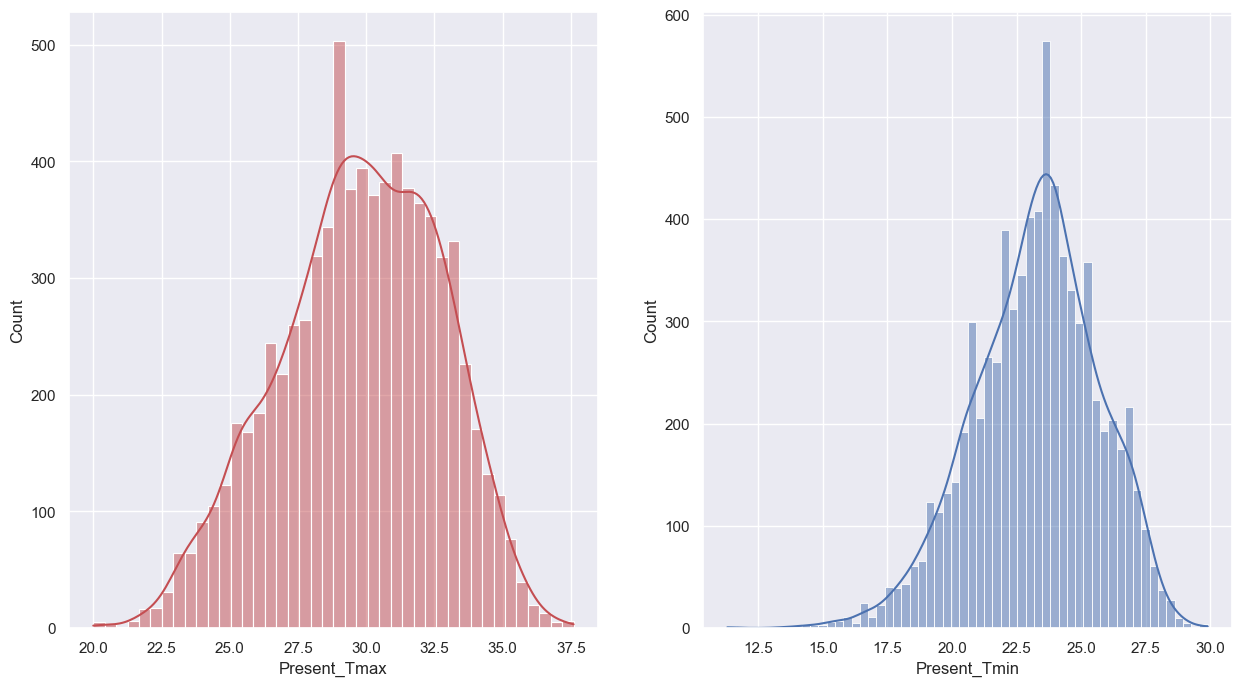

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color="r")
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color="b")
print("Minimum Tmax is {} and Maximum Tmin is {}".format(df['Present_Tmax'].min(),df["Present_Tmax"].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(df['Present_Tmin'].min(),df['Present_Tmin'].max()))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.826'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.909'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.937'),
  Text(7, 0, '126.938'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.004'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.032'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.058'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.099'),
  Text(24, 0, '127.135')])

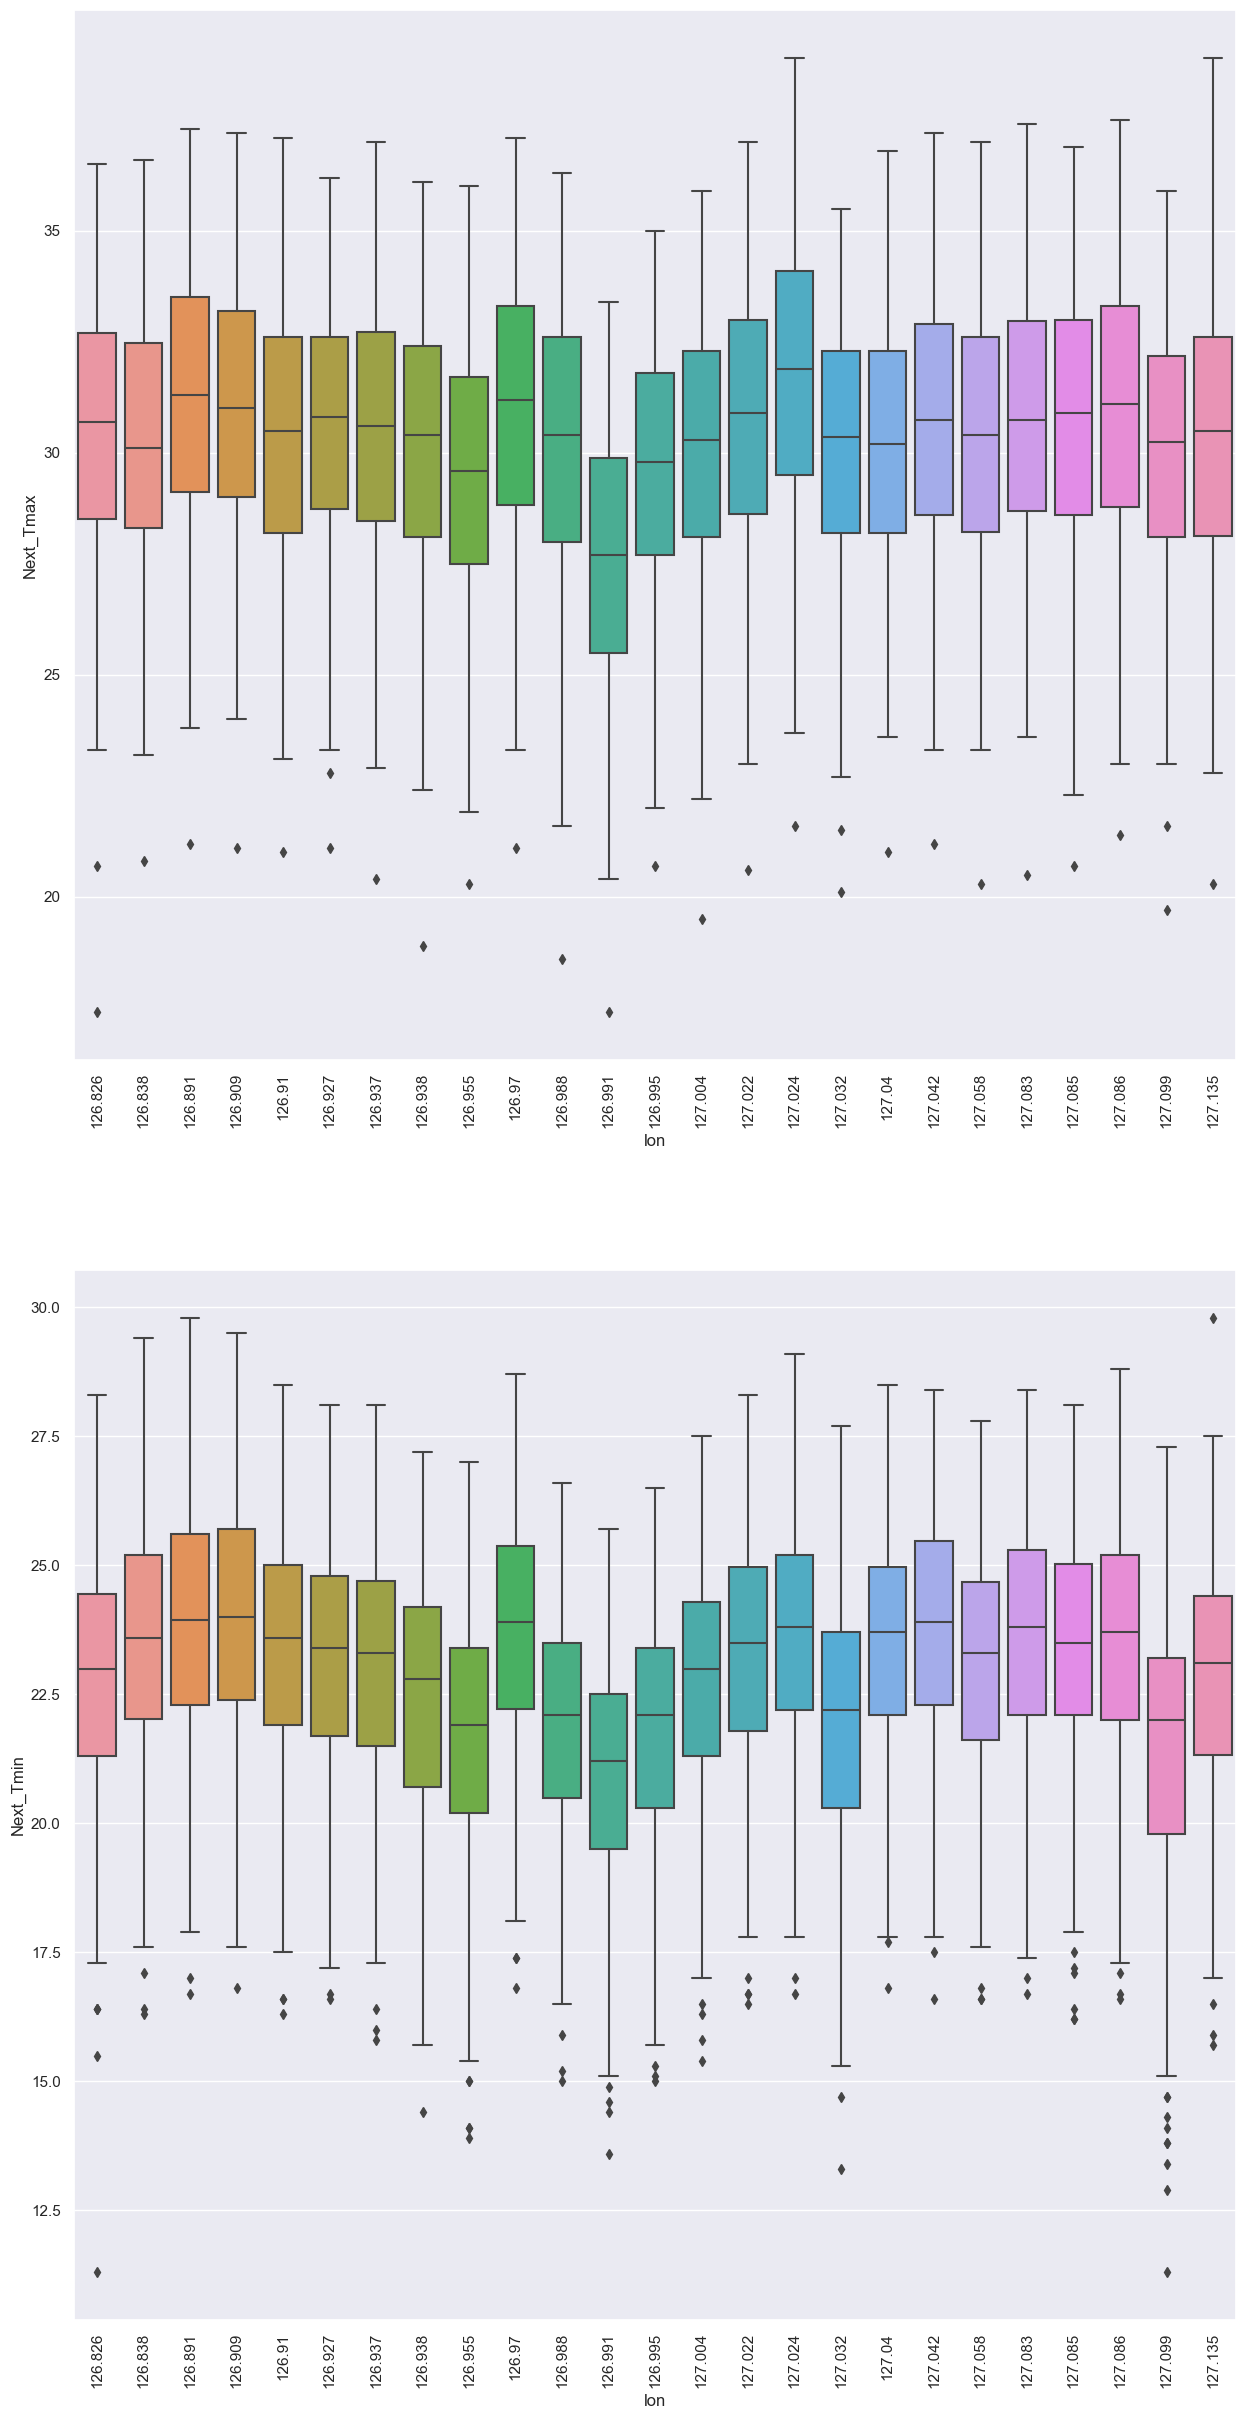

In [16]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

# pre-processing pipeline

In [17]:
df.drop('Date', axis=1, inplace=True)

In [18]:
df['Slope'].unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])

In [19]:
df['Slope'].replace({0.0984746:0.0985,5.17823:5.1782},inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0.0985'),
  Text(1, 0, '0.1332'),
  Text(2, 0, '0.1457'),
  Text(3, 0, '0.1554'),
  Text(4, 0, '0.2223'),
  Text(5, 0, '0.2661'),
  Text(6, 0, '0.2713'),
  Text(7, 0, '0.4125'),
  Text(8, 0, '0.5055'),
  Text(9, 0, '0.5141'),
  Text(10, 0, '0.5721'),
  Text(11, 0, '0.5931'),
  Text(12, 0, '0.618'),
  Text(13, 0, '0.6233'),
  Text(14, 0, '0.697'),
  Text(15, 0, '0.8552'),
  Text(16, 0, '1.2313'),
  Text(17, 0, '1.5629'),
  Text(18, 0, '1.7678'),
  Text(19, 0, '2.2579'),
  Text(20, 0, '2.5348'),
  Text(21, 0, '2.6865'),
  Text(22, 0, '2.785'),
  Text(23, 0, '4.7296'),
  Text(24, 0, '5.1782')])

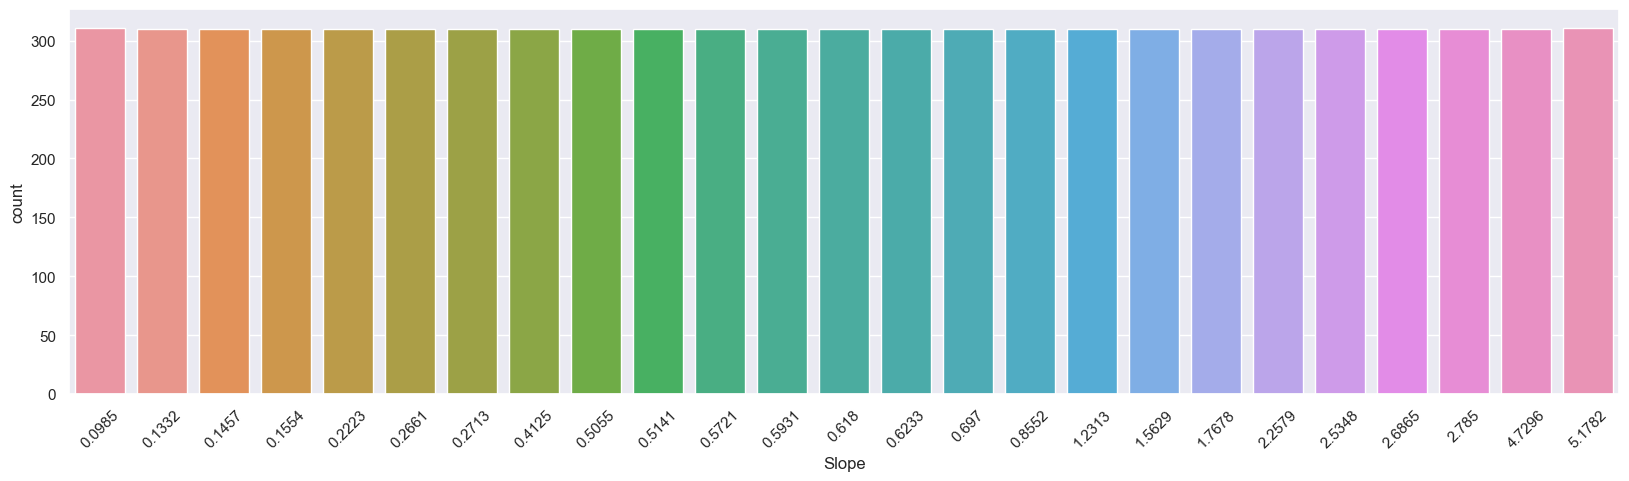

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(df['Slope'])
plt.xticks(rotation=45)

In [21]:
from scipy.stats import mode

In [22]:
df=df[df['Next_Tmax'].notnull()]

In [23]:
table=pd.pivot_table(values='station',index='Slope',data=df)
table.head()

,station
Slope,
0.0985,7.0
0.1332,22.0
0.1457,6.0
0.1554,23.0
0.2223,24.0


# present tmax and timin

In [27]:
df.dropna(inplace=True)

<AxesSubplot:>

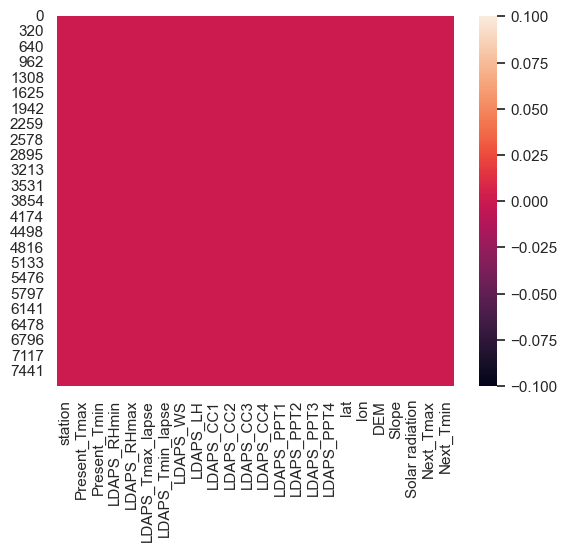

In [28]:
sns.heatmap(df.isnull())